In [1]:
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train

,Month,Avg_sunspot_count
0,01-01-1749,97
1,02-01-1749,104
2,03-01-1749,117
3,04-01-1749,93
4,05-01-1749,142
...,...,...
3139,08-01-2010,30
3140,09-01-2010,36
3141,10-01-2010,34
3142,11-01-2010,34


In [4]:
test

,Month,Avg_sunspot_count
0,01-01-2011,35.177340
1,02-01-2011,40.411136
2,03-01-2011,43.654106
3,04-01-2011,46.067627
4,05-01-2011,51.263532
...,...,...
115,08-01-2020,61.514023
116,09-01-2020,62.026198
117,10-01-2020,62.584529
118,11-01-2020,63.188927


In [5]:
train.describe()

,Avg_sunspot_count
count,3144.000000
mean,82.994593
std,68.436447
min,0.000000
25%,25.000000
50%,69.000000
75%,125.000000
max,398.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              3144 non-null   object
 1   Avg_sunspot_count  3144 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.2+ KB


In [7]:
train.duplicated().sum()

0

In [8]:
train["Month"] = pd.to_datetime(train["Month"], format='%m-%d-%Y') 

In [9]:
train["Month"]

0      1749-01-01
1      1749-02-01
2      1749-03-01
3      1749-04-01
4      1749-05-01
          ...    
3139   2010-08-01
3140   2010-09-01
3141   2010-10-01
3142   2010-11-01
3143   2010-12-01
Name: Month, Length: 3144, dtype: datetime64[ns]

In [10]:
train.set_index(train["Month"], inplace = True)
test.set_index(test["Month"], inplace = True)

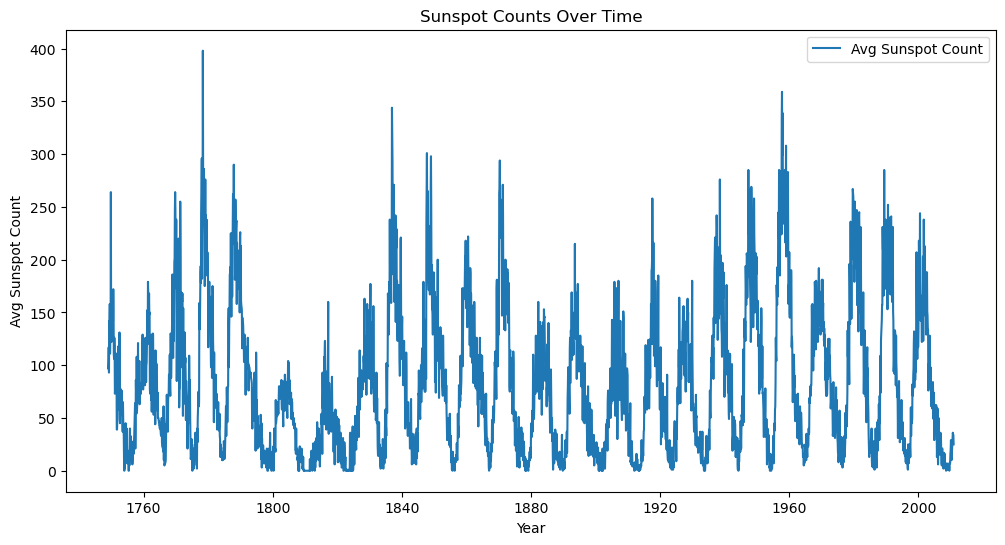

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Avg_sunspot_count'], label='Avg Sunspot Count')
plt.title('Sunspot Counts Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Sunspot Count')
plt.legend()
plt.show()

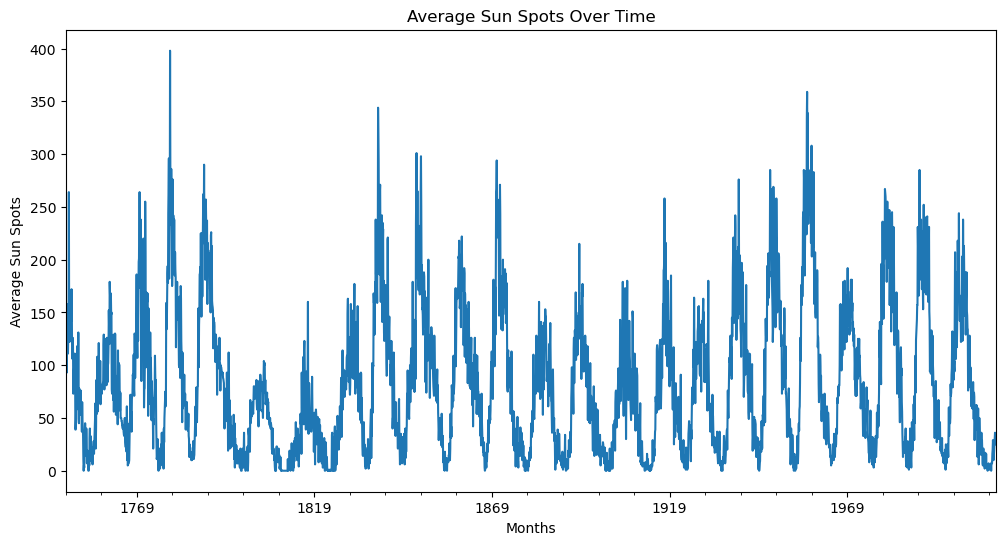

In [12]:
plt.figure(figsize=(12, 6))
train['Avg_sunspot_count'].plot()
plt.xlabel('Months')
plt.ylabel('Average Sun Spots')
plt.title('Average Sun Spots Over Time')
plt.show()

In [13]:
train["Avg_sunspot_count"].mean()

82.99459287531806

In [14]:
train["Avg_sunspot_count"].median()

69.0

In [15]:
train.isna().sum()

Month                0
Avg_sunspot_count    0
dtype: int64

In [16]:
max(train["Avg_sunspot_count"])

398

In [17]:
min(train["Avg_sunspot_count"])

0

In [18]:
train["Avg_sunspot_count"].var()

4683.547218606076

In [19]:
train["Avg_sunspot_count"].std()

68.4364465661834

In [20]:
df_yearly = train['Avg_sunspot_count'].resample('Y').mean()

In [21]:
df_yearly

Month
1749-12-31    135.000000
1750-12-31    139.166667
1751-12-31     79.666667
1752-12-31     79.750000
1753-12-31     51.083333
                 ...    
2006-12-31     24.666667
2007-12-31     12.583333
2008-12-31      4.250000
2009-12-31      4.750000
2010-12-31     25.000000
Freq: A-DEC, Name: Avg_sunspot_count, Length: 262, dtype: float64

In [22]:
df_yearly.max()

268.9166666666667

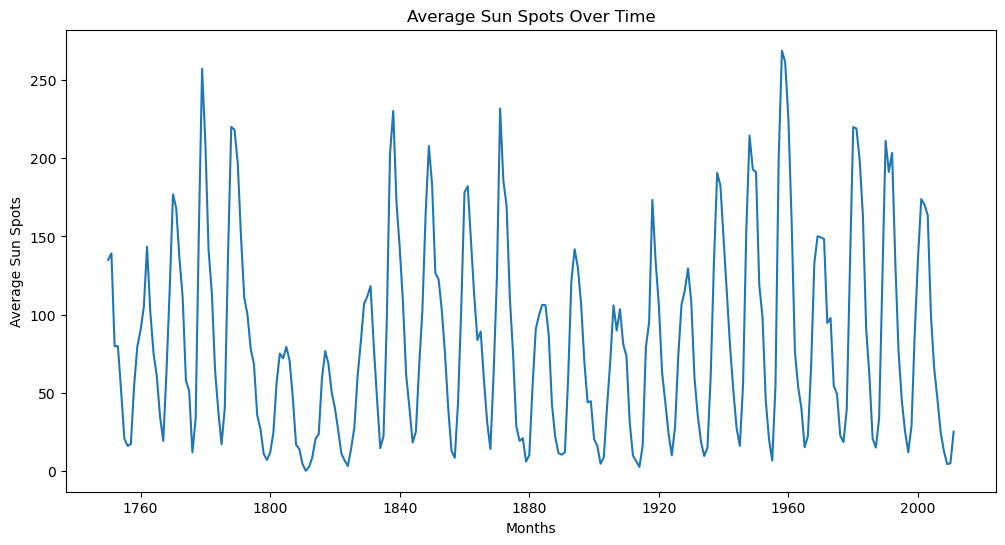

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df_yearly)
plt.xlabel('Months')
plt.ylabel('Average Sun Spots')
plt.title('Average Sun Spots Over Time')
plt.show()

In [24]:
rolmean = train.rolling(window = 12).mean()
rolstd = train.rolling(window = 12).std()

C:\Users\Shruti\AppData\Local\Temp\ipykernel_25744\2563208802.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  rolmean = train.rolling(window = 12).mean()
C:\Users\Shruti\AppData\Local\Temp\ipykernel_25744\2563208802.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  rolstd = train.rolling(window = 12).std()


In [25]:
rolmean

,Avg_sunspot_count
Month,
1749-01-01,NaN
1749-02-01,NaN
1749-03-01,NaN
1749-04-01,NaN
1749-05-01,NaN
...,...
2010-08-01,17.416667
2010-09-01,19.833333
2010-10-01,22.000000


In [26]:
rolstd

,Avg_sunspot_count
Month,
1749-01-01,NaN
1749-02-01,NaN
1749-03-01,NaN
1749-04-01,NaN
1749-05-01,NaN
...,...
2010-08-01,8.404094
2010-09-01,9.262175
2010-10-01,9.283416


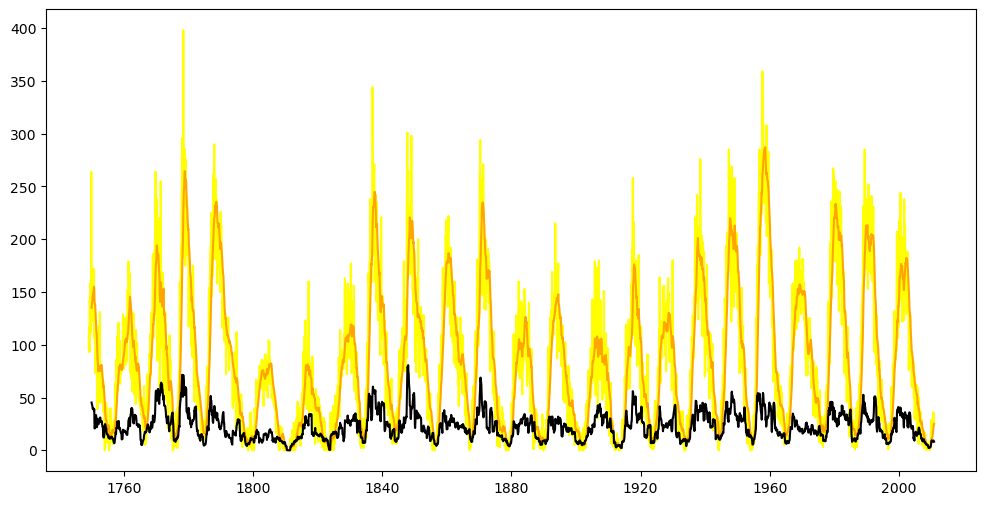

In [27]:
plt.figure(figsize = (12,6))
org = plt.plot(train["Avg_sunspot_count"], color = "yellow", label = "Original")
mea =plt.plot(rolmean, color = "orange", label = "Rolling mean")
s = plt.plot(rolstd, color = "black", label = "Rolling std")

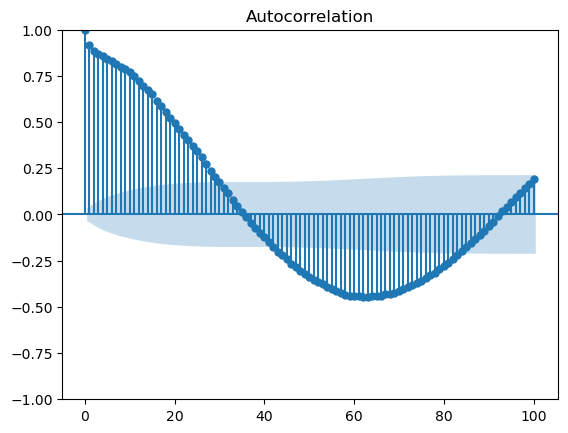

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train['Avg_sunspot_count'], lags=100)
plt.show()


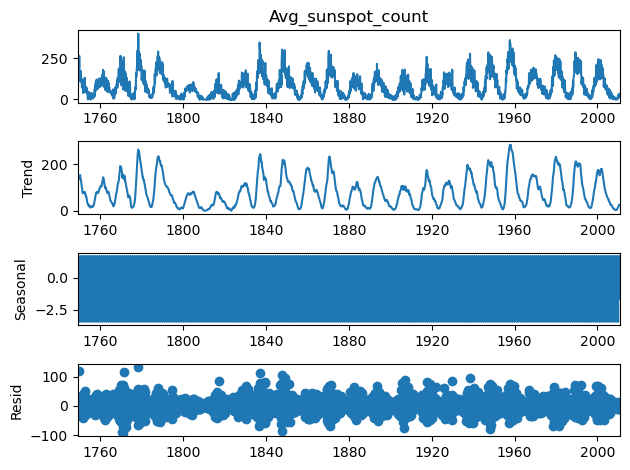

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train['Avg_sunspot_count'], model='additive', period=12)
result.plot()
plt.show()


In [30]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train['Avg_sunspot_count'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -10.390308589912836
p-value: 2.0290768019122553e-18


In [31]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Avg_sunspot_count):
    result=adfuller(Avg_sunspot_count)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [32]:
adfuller_test(train['Avg_sunspot_count'])

ADF Test Statistic : -10.390308589912836
p-value : 2.0290768019122553e-18
#Lags Used : 28
Number of Observations Used : 3115
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


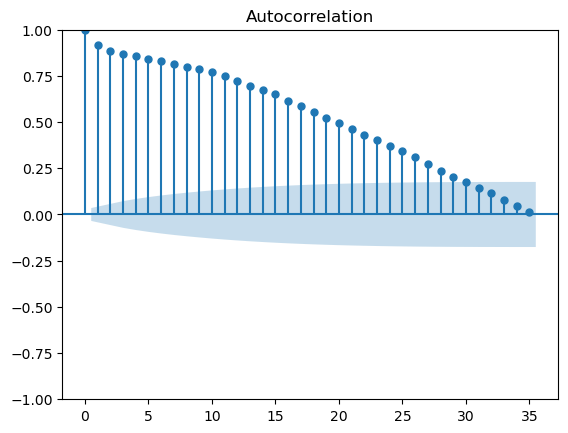

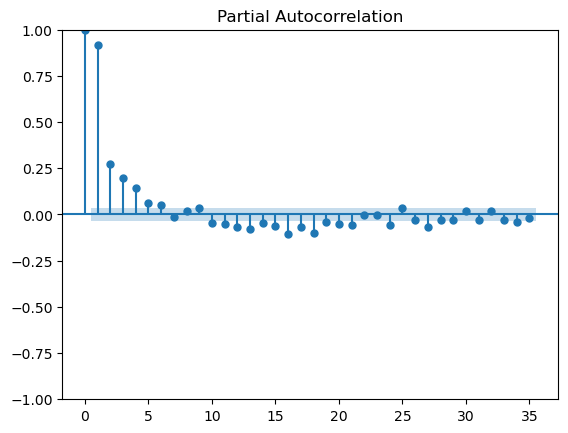

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train['Avg_sunspot_count'])
plot_pacf(train['Avg_sunspot_count'])
plt.show()


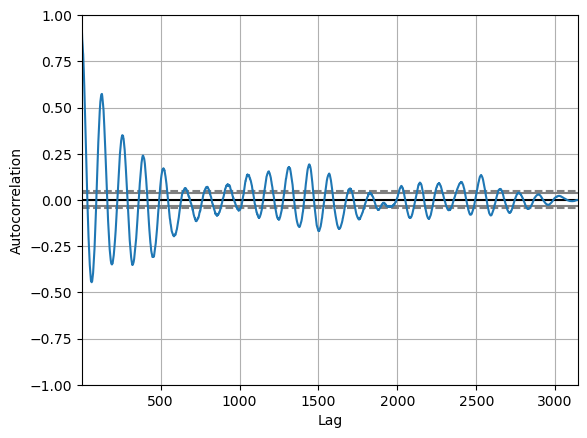

In [34]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train['Avg_sunspot_count'])
plt.show()

In [35]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Avg_sunspot_count'], order=(7, 0, 35))
model_fit = model.fit()


C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 24.41655039112196


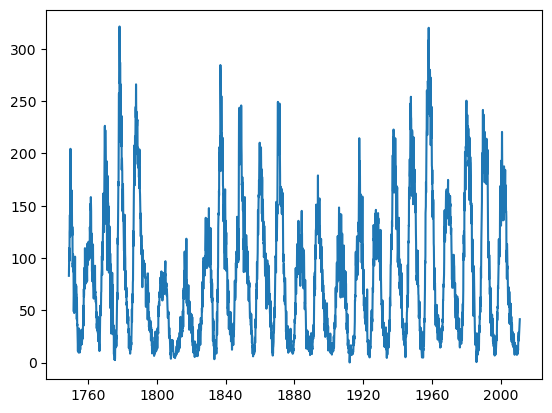

In [36]:
from sklearn.metrics import mean_squared_error
pred1 = model_fit.predict()
plt.plot(pred1)

rmse = np.sqrt(mean_squared_error(train['Avg_sunspot_count'], pred1))

print(f'Root Mean Squared Error (RMSE): {rmse}')


In [37]:
start_date = train.index[0]
end_date = test.index[-1]
pred = model_fit.predict(start = start_date, end = end_date)
pred

1749-01-01     82.985780
1749-02-01     95.790896
1749-03-01    100.784192
1749-04-01    109.576077
1749-05-01     97.230730
                 ...    
2020-08-01     61.514023
2020-09-01     62.026198
2020-10-01     62.584529
2020-11-01     63.188927
2020-12-01     63.835581
Freq: MS, Name: predicted_mean, Length: 3264, dtype: float64

In [38]:
test["Avg_sunspot_count"] = pred

In [39]:
test

,Month,Avg_sunspot_count
Month,,
01-01-2011,01-01-2011,35.177340
02-01-2011,02-01-2011,40.411136
03-01-2011,03-01-2011,43.654106
04-01-2011,04-01-2011,46.067627
05-01-2011,05-01-2011,51.263532
...,...,...
08-01-2020,08-01-2020,61.514023
09-01-2020,09-01-2020,62.026198
10-01-2020,10-01-2020,62.584529


<AxesSubplot:xlabel='Month'>

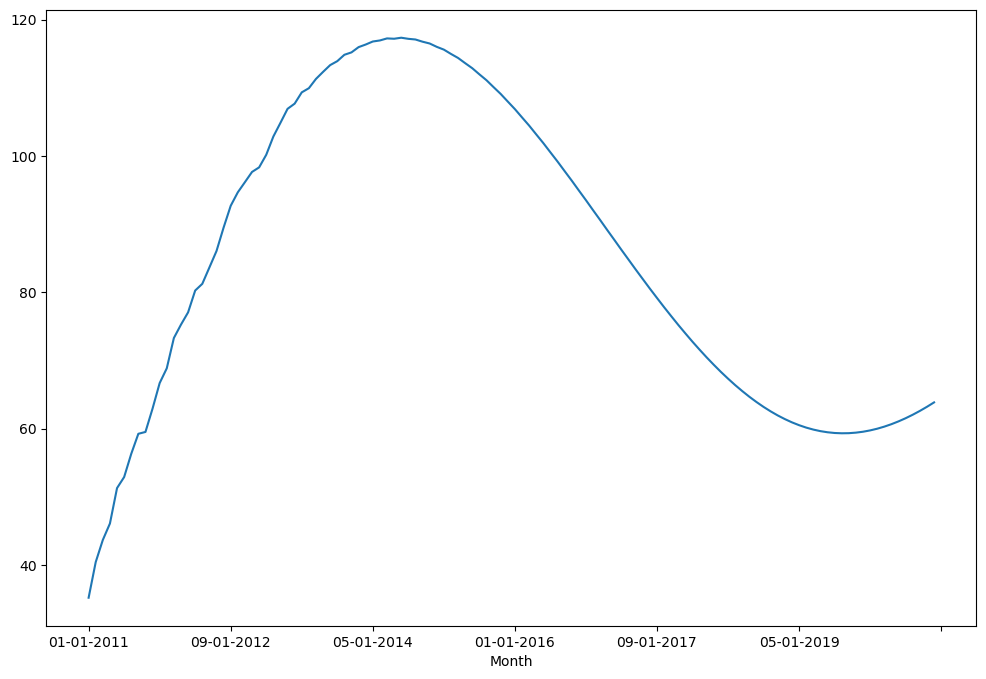

In [40]:
test["Avg_sunspot_count"].plot(figsize=(12,8))

In [41]:
future_df=pd.concat([train,test])
future_df

,Month,Avg_sunspot_count
Month,,
1749-01-01 00:00:00,1749-01-01 00:00:00,97.000000
1749-02-01 00:00:00,1749-02-01 00:00:00,104.000000
1749-03-01 00:00:00,1749-03-01 00:00:00,117.000000
1749-04-01 00:00:00,1749-04-01 00:00:00,93.000000
1749-05-01 00:00:00,1749-05-01 00:00:00,142.000000
...,...,...
08-01-2020,08-01-2020,61.514023
09-01-2020,09-01-2020,62.026198
10-01-2020,10-01-2020,62.584529


<AxesSubplot:xlabel='Month'>

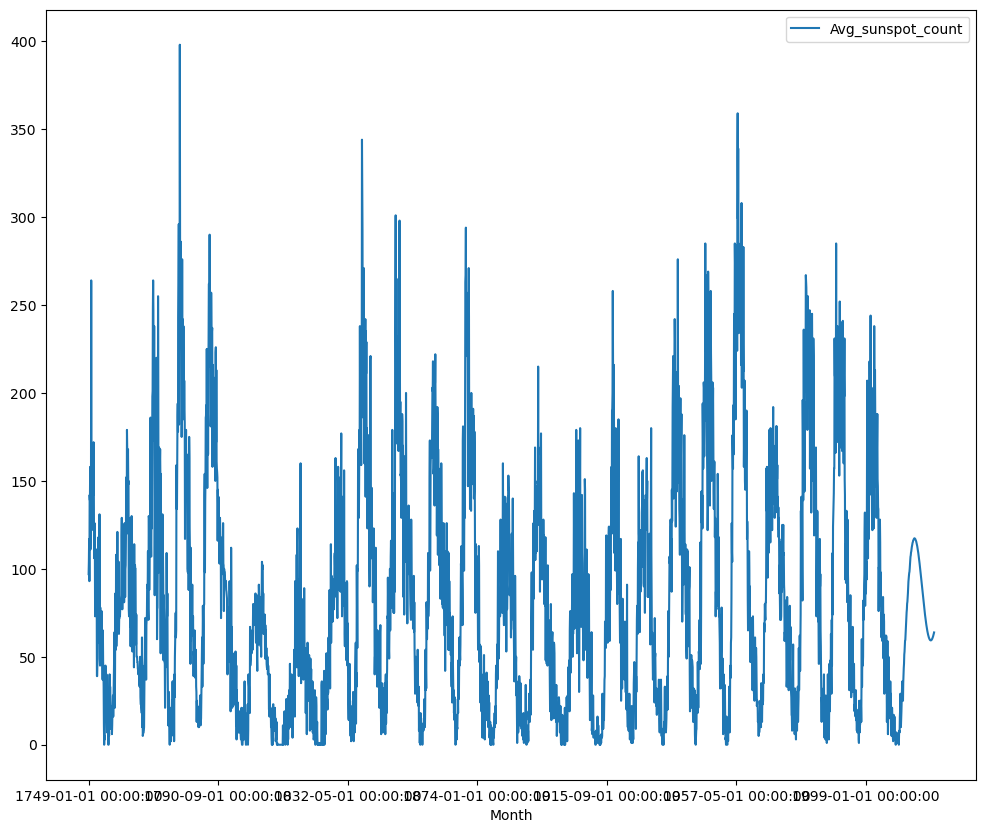

In [42]:
future_df[['Avg_sunspot_count']].plot(figsize=(12, 10)) 

C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 24.40403972420458


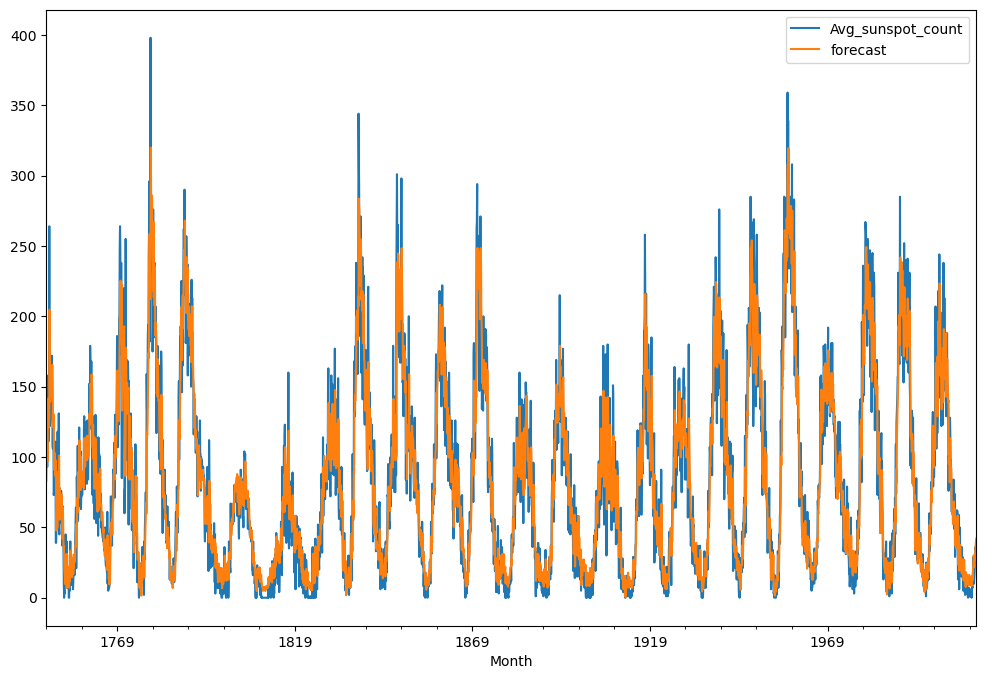

In [43]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Avg_sunspot_count'], order=(10, 0, 35))
model_fit = model.fit()
train["forecast"] = model_fit.predict()
train[['Avg_sunspot_count','forecast']].plot(figsize=(12,8))
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(train['Avg_sunspot_count'], train["forecast"]))

print(f'Root Mean Squared Error (RMSE): {rmse}')



In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [45]:
model_SARIMA=SARIMAX(train['Avg_sunspot_count'],order=(10,0,35),seasonal_order=(0,1,0,12))

C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 24.40403972420458


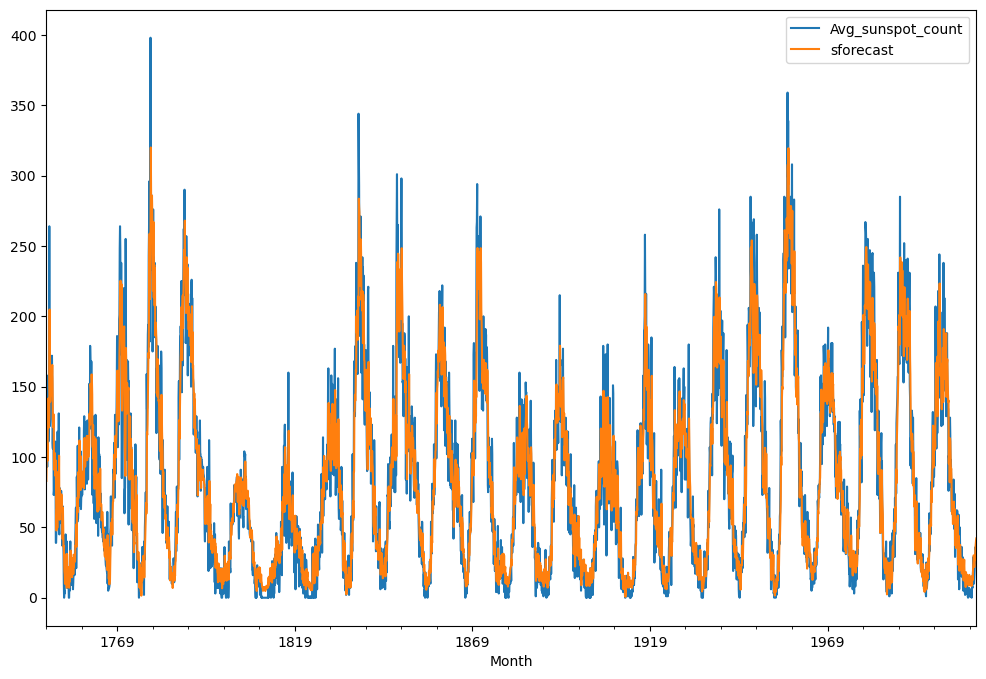

In [46]:
model_SARIMA_fit=model_SARIMA.fit()
train["sforecast"] = model_fit.predict()
train[['Avg_sunspot_count','sforecast']].plot(figsize=(12,8))
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(train['Avg_sunspot_count'], train["sforecast"]))

print(f'Root Mean Squared Error (RMSE): {rmse}')

In [47]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                     Avg_sunspot_count   No. Observations:                 3144
Model:             SARIMAX(10, 0, 35)x(0, 1, [], 12)   Log Likelihood              -14545.977
Date:                               Thu, 12 Sep 2024   AIC                          29183.955
Time:                                       00:20:35   BIC                          29462.228
Sample:                                   01-01-1749   HQIC                         29283.830
                                        - 12-01-2010                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1807      0.547     -0.330      0.741      -1.253       0.892
ar.L2         -0.4960      0.540     -0.918      0.359      -1.555       0.563
ar.L3         -0.2121      0.344     -0.617      0.537      -0.886       0.462
ar.L4         -0.1185      0.259     -0.457      0.647      -0.626       0.389
ar.L5          0.0758      0.245      0.309      0.757      -0.405       0.557
ar.L6          0.2158      0.233      0.925      0.355      -0.242       0.673
ar.L7          0.3382      0.248      1.362      0.173      -0.149       0.825
ar.L8          0.4616      0.338      1.364      0.172      -0.202       1.125
ar.L9          0.3313      0.384      0.864      0.388      -0.421       1.083
ar.L10         0.4822      0.339      1.421      0.155      -0.183       1.147
ma.L1          0.7395      0.547      1.352      0.176      -0.333       1.812
ma.L2          1.0134      0.707      1.434      0.152      -0.372       2.399
ma.L3          0.9453      0.604      1.564      0.118      -0.239       2.130
ma.L4          0.9233      0.356      2.595      0.009       0.226       1.621
ma.L5          0.7443      0.305      2.438      0.015       0.146       1.343
ma.L6          0.5757      0.416      1.384      0.166      -0.239       1.391
ma.L7          0.3217      0.429      0.750      0.453      -0.519       1.162
ma.L8          0.0505      0.263      0.192      0.848      -0.465       0.566
ma.L9          0.0562      0.249      0.226      0.821      -0.432       0.544
ma.L10        -0.1875      0.242     -0.775      0.439      -0.662       0.287
ma.L11         0.1345      0.112      1.205      0.228      -0.084       0.353
ma.L12        -0.7469      0.136     -5.483      0.000      -1.014      -0.480
ma.L13        -0.4699      0.482     -0.974      0.330      -1.415       0.475
ma.L14        -0.7428      0.602     -1.234      0.217      -1.923       0.437
ma.L15        -0.6267      0.504     -1.242      0.214      -1.616       0.362
ma.L16        -0.6362      0.270     -2.358      0.018      -1.165      -0.107
ma.L17        -0.4396      0.210     -2.092      0.036      -0.851      -0.028
ma.L18        -0.3191      0.317     -1.006      0.315      -0.941       0.303
ma.L19        -0.1079      0.341     -0.317      0.751      -0.775       0.560
ma.L20         0.1421      0.222      0.641      0.522      -0.293       0.577
ma.L21         0.0550      0.285      0.193      0.847      -0.504       0.614
ma.L22         0.2630      0.280      0.940      0.347      -0.285       0.811
ma.L23        -0.0699      0.112     -0.623      0.533      -0.290       0.150
ma.L24        -0.2486      0.129     -1.931      0.053      -0.501       0.004
ma.L25        -0.2685      0.132     -2.029      0.042      -0.528      -0.009
ma.L26        -0.2661      0.126     -2.113      0.035      -0.513      -0.019
ma.L27        -0.3147    

In [48]:
start_date = train.index[0]
end_date = test.index[-1]
pred_Sarima=model_SARIMA_fit.predict(start=start_date,end= end_date, steps = 120)

In [49]:
test["sarima_pred"] = pred_Sarima

<AxesSubplot:xlabel='Month'>

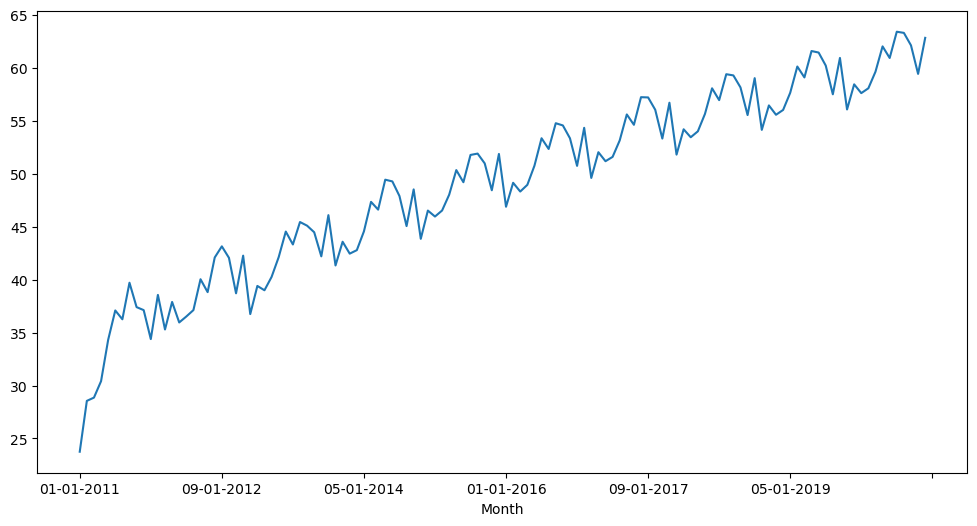

In [50]:
test["sarima_pred"].plot(figsize = (12,6))

<AxesSubplot:xlabel='Month'>

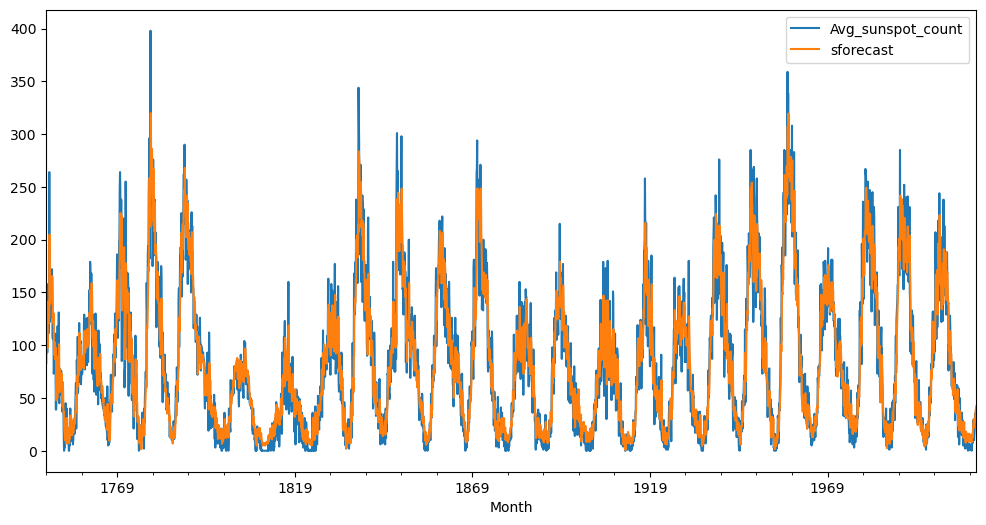

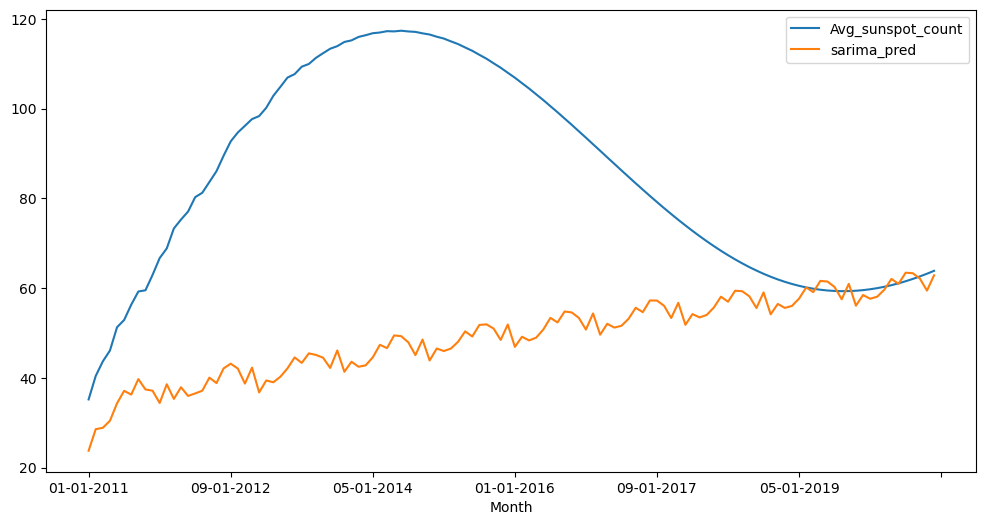

In [51]:
train[['Avg_sunspot_count', 'sforecast']].plot(figsize = (12,6))
test[['Avg_sunspot_count', 'sarima_pred']].plot(figsize = (12,6))
